Proveďte Fourierovu transformaci signálu 

$$s(t) = 5 + 2\cos(2\pi t-90°) + 3\cos(4\pi t)$$

se vzorkovací frekvencí $f_{vz}=4~{\rm Hz}, T=\frac{1}{f} = T=\frac{1}{4}$
a s použitím celkem 4 vzorků $t=\{0T, 1T, 2T, 3T \} = \{0,\frac{1}{4},\frac{1}{2},\frac{3}{4}\}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure


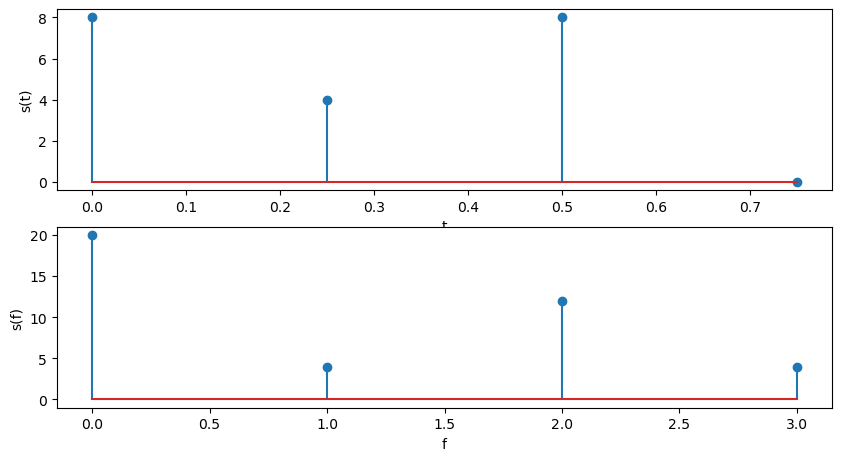

In [2]:

def s_t(tvec):
    #convert to radians
    st = 5 + 2*np.cos(2*np.pi*tvec - 90*np.pi/180) + 3*np.cos(4*np.pi*tvec)
    return np.array(st)

tvec =np.array([0,1/4,0.5,3/4])
Fvz=4;
T=1/Fvz;

#fill the signal with values
st = s_t(tvec)
sn = np.complex128(np.zeros(tvec.size))

#declare complex field to asign exp(-i*2pi/N) params use 1j for complex number
W = np.complex128(np.ones((4,4)))
Wp = np.exp(-1j*(2*np.pi/tvec.size))

plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(3,1,1)
plt.stem(tvec,st);
plt.xlabel('t');
plt.ylabel('s(t)');

#create matrix W 
for i in range(1,tvec.size):
    for j in range(1, tvec.size):
     #print(i,j, i*j)    
     W[i,j] = Wp**((i)*(j))

#solve matrix equation W*s(t) to obtain s_n
soucin=0;
for i in range(0,tvec.size): #loop over all values in st
    soucin=0.0;
    for j in range(0,tvec.size):
        soucin += W[i,j]*st[j]
    sn[i] = soucin

#convert imaginary result to real values 
snSize = np.abs(sn)

plt.subplot(3,1,2)
plt.stem(np.arange(tvec.size),snSize);
plt.xlabel('f');
plt.ylabel('s(f)');


Pro vyřešení úlohy použijte dále vestavěšnou funkci [numpy.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
- optimalizace výpočtu matice W pomocí tzv. [Cooley-Turkey algoritmu] (https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm)
- Algoritmus založený na prvočíslech, tzv. [Prime-factor] (https://en.wikipedia.org/wiki/Prime-factor_FFT_algorithm)
- apod.

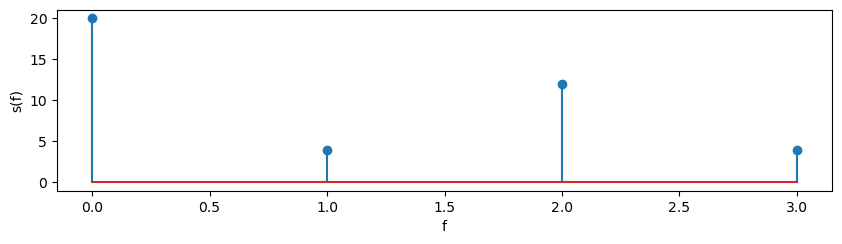

In [3]:
snNumpy = np.abs(np.fft.fft(st))

plt.subplot(3,1,3)
plt.stem(np.arange(tvec.size),snNumpy);
plt.xlabel('f');
plt.ylabel('s(f)');




Zpětná Fourierova transformace pracuje na stejném principu jako přímá transformace, ale s rozdílným znaménkem v exponentu 

- Fourierova transformace $$s(k) = \sum_{n=0}^{N-1} s(t) e^{-i\frac{2\pi}{N}kn} $$
- Zpětná transformace $$s(t) = \frac{1}{N}\sum_{k=0}^{N-1} s(k) e^{i\frac{2\pi}{N}kn} $$
    

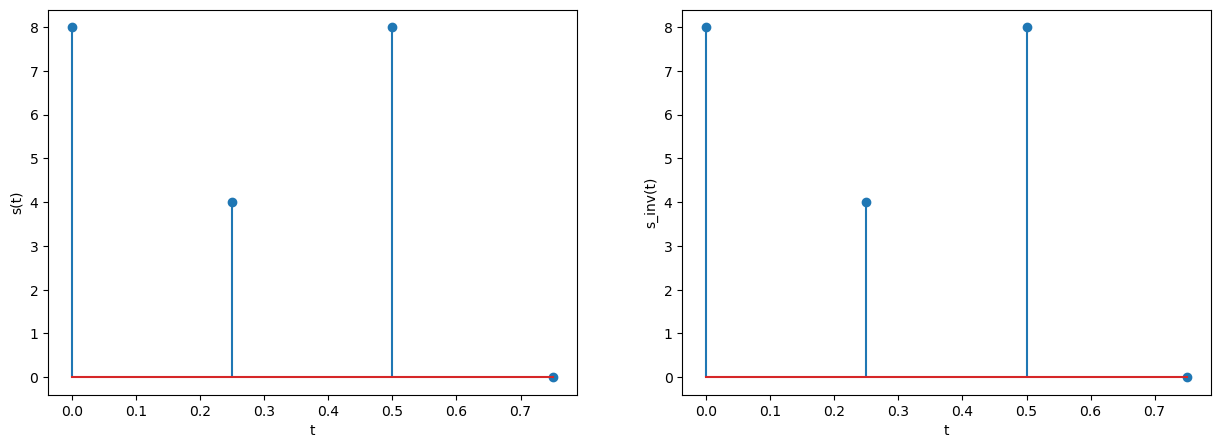

In [4]:
st_inverse=np.complex128(np.zeros(tvec.size))

#create inverse Matrix
Winv = np.complex128(np.ones((4,4)))
Wpinv = np.exp(1j*(2*np.pi/tvec.size))

#create inv W matrix
for i in range(1,tvec.size):
    for j in range(1, tvec.size):     
     Winv[i,j] = Wpinv**((i)*(j))


#solve matrix equation W*s(t) to obtain s_n
soucin=0+0j;
for i in range(0,tvec.size): #loop over all values in st
    soucin=0+0j;
    for j in range(0,tvec.size):
        soucin += Winv[i,j]*sn[j]
    st_inverse[i] = soucin/tvec.size

st_inverse = abs(st_inverse)

plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1,2,1)
plt.stem(tvec,st);
plt.xlabel('t');
plt.ylabel('s(t)');

plt.subplot(1,2,2)
plt.stem(tvec,st_inverse);
plt.xlabel('t');
plt.ylabel('s_inv(t)');



Proveďte Fourierovu transformaci 
- **funkce s náhodným šumem** $$s(t) = A_0\cos{(2\pi f t)} + \gamma, \gamma \in (-0.5A_0, 0.5A_0)$$
- funkce s šumem o frekvenci $f_{noise} > f$ $$s(t) = A_0\cos{(2\pi f t)} + A_0\cos{(2\pi f_{noise} t)}) $$

Pro výše uvedené funkce proveďte zpětnou transformaci kdy
- nebudete manipulovat se spektrem funkce
- navrhnete způsob pro odstranění šumu

Studujte vliv odstraněných složek na zpětnou transfromaci funkce $s(t)$.


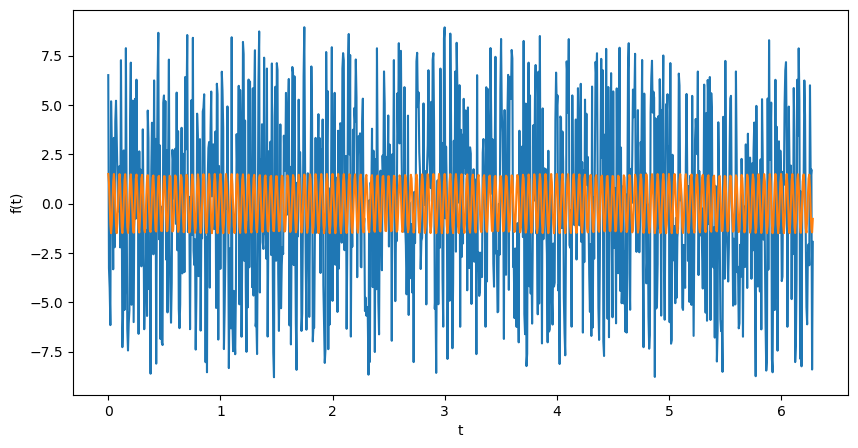

In [58]:
def mojeF(A0,f,tvec):
    Fvals = A0*np.cos(2*np.pi*f*tvec)
    return np.array(Fvals)

def Err(A0,tvec):
    Errvals = 2*A0*np.random.rand(tvec.size) - A0;
    return np.array(5*Errvals)

n_length = 1000;
A0 = 1.5;
f = 20; #Hz
tvec = np.linspace(0,2*np.pi,n_length,endpoint=True)

Fvals = mojeF(A0,f,tvec);
Errvals = Err(A0,tvec);
Fun = Fvals + Errvals;

plt.rcParams["figure.figsize"] = (10,5);
plt.plot(tvec,Fun);
plt.plot(tvec,Fvals);
plt.xlabel('t');
plt.ylabel('f(t)');
plt.show();



[126 874]
[910.15839662 910.15839662]


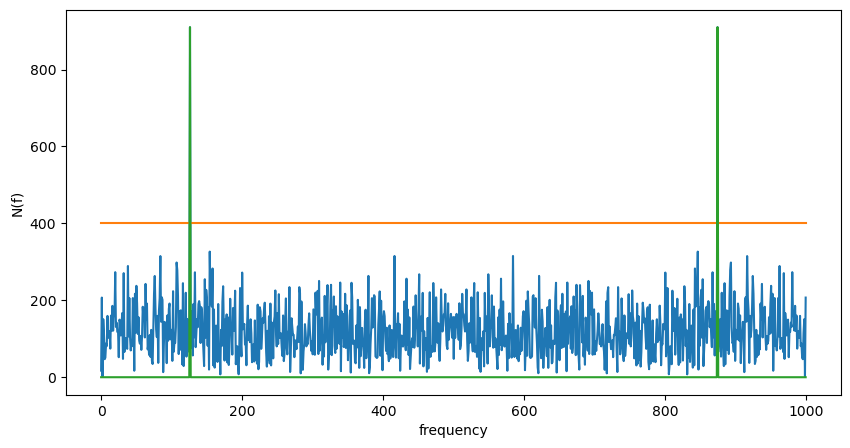

In [59]:
# perform FFT 

from scipy.signal import find_peaks


nfreq = 1000; #limit the f values
thresh = 400 #threshold values 
Scompl = np.fft.fft(Fun);
#Scompl = np.fft.fftshift(Fun)
Sk = np.abs(Scompl);
Freqs = np.arange(Sk.size);
Border = np.zeros(Freqs[0:nfreq].size)
Border[:] = thresh

plt.plot(Freqs[0:nfreq],Sk[0:nfreq]);
plt.plot(Freqs[0:nfreq],Border);

#identify position where S(i) < thresh -> remove noise
Sk[Sk < thresh] = 0;
Scompl[Sk < thresh] = 0 + 0j;

peaks, _ = find_peaks(Sk, height=thresh)
print(peaks)
print(Sk[peaks])


plt.plot(Freqs[0:nfreq],Sk[0:nfreq]);
plt.xlabel('frequency')
plt.ylabel('N(f)')
plt.show();

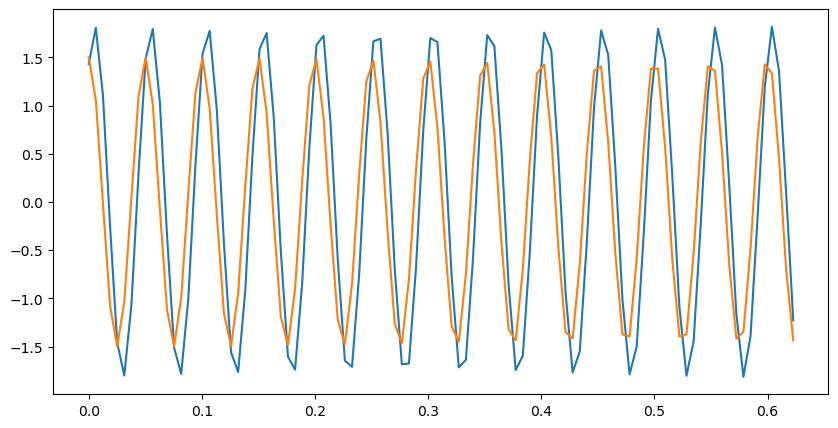

In [61]:
#perform inverse FFT and plot the function
Fvalsinv =np.fft.ifft(Scompl)
plt.plot(tvec[0:100],Fvalsinv.real[0:100]); 
plt.plot(tvec[0:100],Fvals[0:100]);